In [19]:
import numpy as np
import seaborn as sns
from tfac.figures.figureCommon import getSetup
from tfac.Data_Mod import form_tensor, z_score_tensor_bymeasure, z_score_tensor_byprotein
from tfac.tensor import partial_tucker_decomp, tucker_decomp, find_R2X_tucker, find_R2X_partialtucker
from tfac.figures.figure1 import proteinScatterPlot, proteinBoxPlot

In [20]:
tensor, treatments, times = form_tensor()
tensor_measure = z_score_tensor_bymeasure(tensor)
results_measure = partial_tucker_decomp(tensor_measure, [2], 6)

In [21]:
tensor, treatments, times = form_tensor()
tensor_protein = z_score_tensor_byprotein(tensor)
results_protein = partial_tucker_decomp(tensor_protein, [2], 6)

In [25]:
import pandas as pd
df_protein = pd.DataFrame(results_protein[1][0])
df_measure = pd.DataFrame(results_measure[1][0])

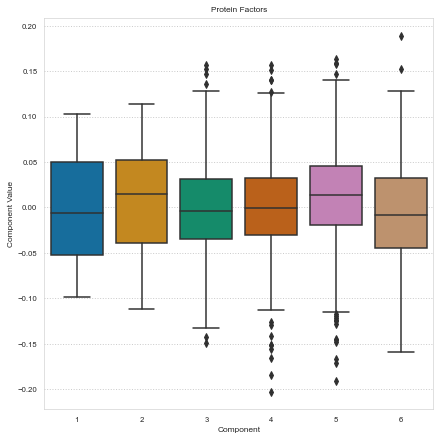

In [24]:
ax, f = getSetup((6, 6), (1, 1))
proteinBoxPlot(ax[0], df_protein)

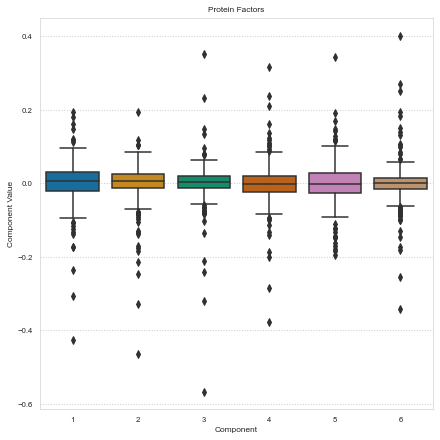

In [26]:
ax, f = getSetup((6, 6), (1, 1))
proteinBoxPlot(ax[0], df_measure)

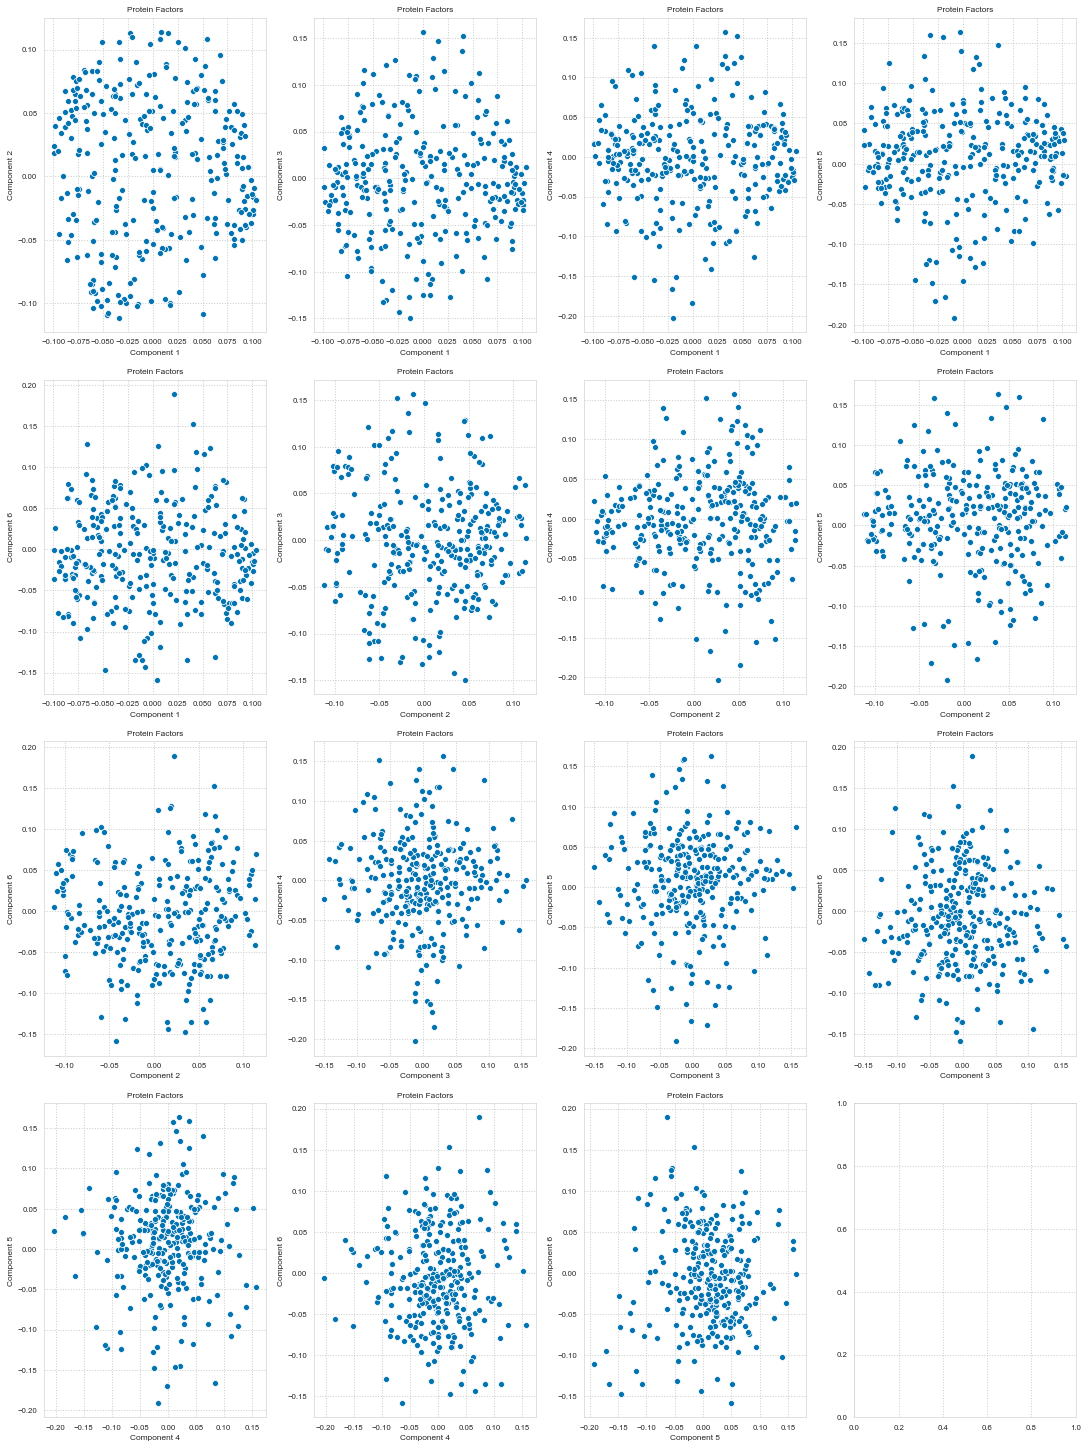

In [28]:
ax, f = getSetup((15, 20), (4, 4))
counter = 0
for i in range(6):
    for j in range(i + 1, 6):
        proteinScatterPlot(ax[counter], results_protein[1][0], i+1, j+1)
        counter += 1

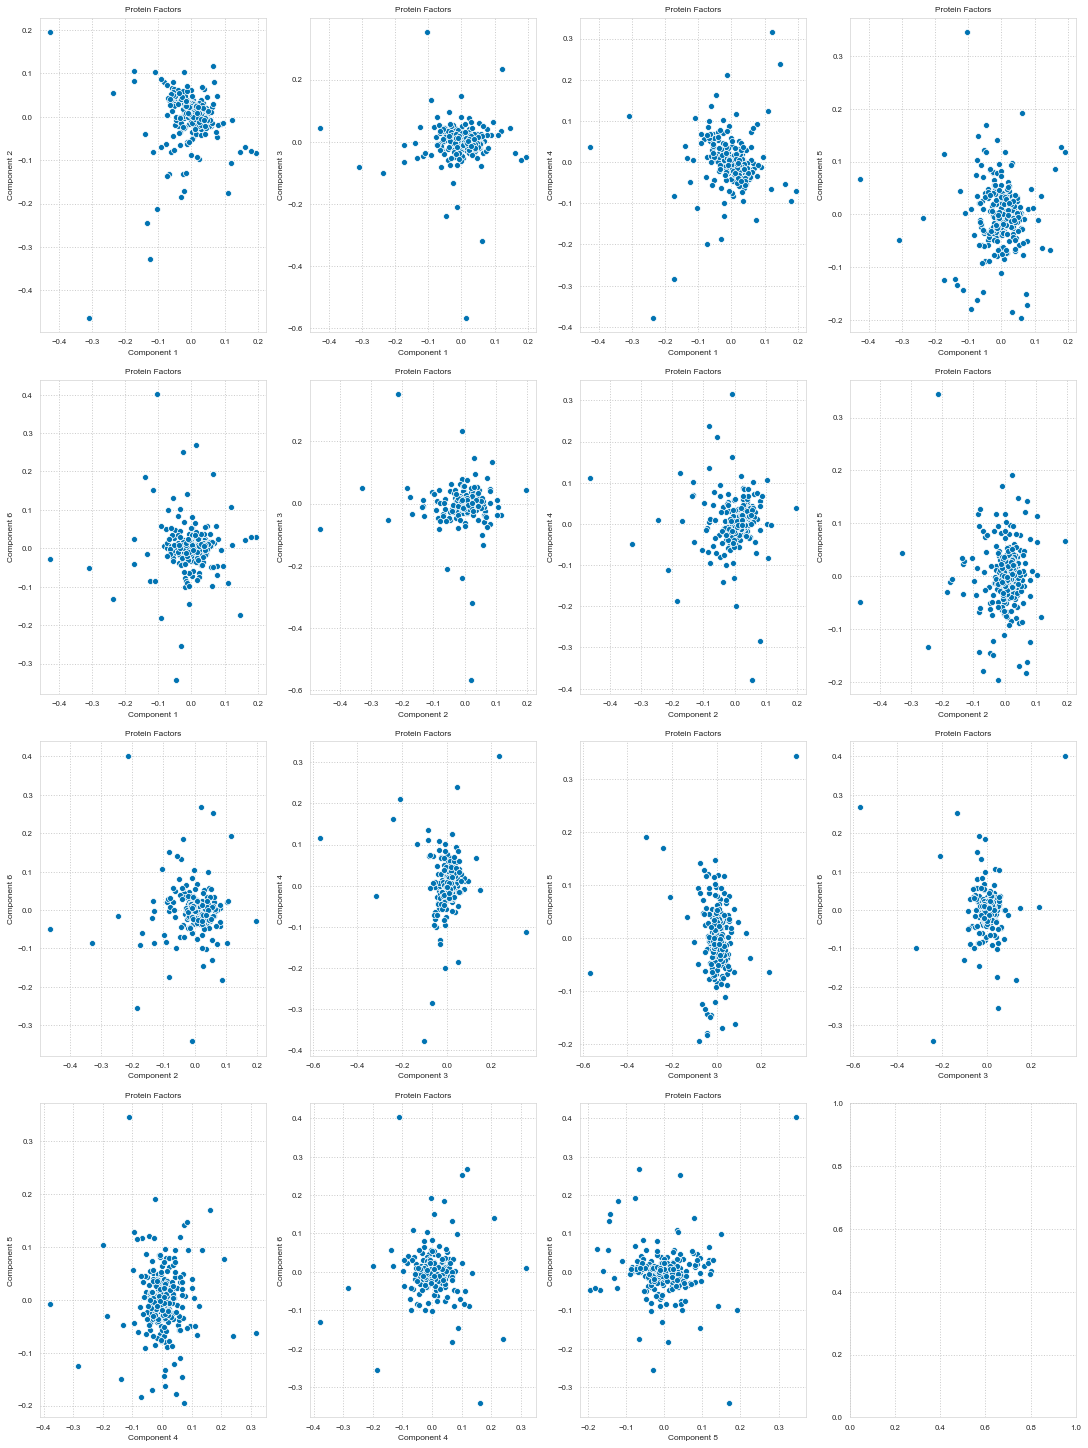

In [29]:
ax, f = getSetup((15, 20), (4, 4))
counter = 0
for i in range(6):
    for j in range(i + 1, 6):
        proteinScatterPlot(ax[counter], results_measure[1][0], i+1, j+1)
        counter += 1

In [32]:
df = pd.DataFrame(results_protein[1][0])
from tfac.dataHelpers import importLINCSprotein

proteins = importLINCSprotein()
columns = proteins.columns[3:298]

df["Proteins"] = columns

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
prots = {}
for i in range(df.columns.size - 1):
    print(np.round((Q1[i] - 1.5*IQR[i]), 2), np.round((Q3[i] + 1.5*IQR[i]), 2))
    positives = []
    negatives = []
    for row, col in df.iterrows():
        if (col[i] < (Q1[i] - 1.5 * IQR[i])):
            negatives.append((col[i], col["Proteins"]))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
        elif (col[i] > (Q3[i] + 1.5 * IQR[i])):
            positives.append((col[i], col['Proteins']))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
    #print()
    negatives = sorted(negatives)[:5]
    positives = sorted(positives)[-5:]
    for tup in positives:
        print(tup[1])
    for tup in positives:
        print(np.round(tup[0], 2))
    print()
    for tup in negatives:
        print(tup[1])
    for tup in negatives:
        print(np.round(tup[0], 2))
    print()
#display(prots)

-0.21 0.2


-0.18 0.19


-0.13 0.13
XPA-M-V
Chk2-M-V
GCN5L2-R-V
PMS2-R-V
0.14
0.15
0.15
0.16

14-3-3-zeta-R-V
Gab2-R-V
-0.15
-0.14

-0.12 0.13
HES1-R-V
Tyro3-R-V
TFRC-R-V
E-Cadherin-R-V
EGFR-R-V
0.13
0.14
0.14
0.15
0.16

PD-L1-R-C
Caspase-8-M-Q
IRF-1-R-C
Jak2-R-V
c-IAP2-R-C
-0.2
-0.18
-0.17
-0.16
-0.15

-0.12 0.14
Tuberin_pT1462-R-V
Axl-R-V
Gys_pS641-R-V
Slfn11-G-C
0.15
0.16
0.16
0.16

Snail-M-Q
Hif-1-alpha-M-C
NDRG1_pT346-R-V
CD44-M-C
Stat3_pY705-R-V
-0.19
-0.17
-0.17
-0.15
-0.15

-0.16 0.15
Cox-IV-R-V
Pdcd4-R-C
0.15
0.19




In [33]:
df = pd.DataFrame(results_measure[1][0])
from tfac.dataHelpers import importLINCSprotein

proteins = importLINCSprotein()
columns = proteins.columns[3:298]

df["Proteins"] = columns

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
prots = {}
for i in range(df.columns.size - 1):
    print(np.round((Q1[i] - 1.5*IQR[i]), 2), np.round((Q3[i] + 1.5*IQR[i]), 2))
    positives = []
    negatives = []
    for row, col in df.iterrows():
        if (col[i] < (Q1[i] - 1.5 * IQR[i])):
            negatives.append((col[i], col["Proteins"]))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
        elif (col[i] > (Q3[i] + 1.5 * IQR[i])):
            positives.append((col[i], col['Proteins']))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
    #print()
    negatives = sorted(negatives)[:5]
    positives = sorted(positives)[-5:]
    for tup in positives:
        print(tup[1])
    for tup in positives:
        print(np.round(tup[0], 2))
    print()
    for tup in negatives:
        print(tup[1])
    for tup in negatives:
        print(np.round(tup[0], 2))
    print()
display(prots)

-0.1 0.11
FAK_pY397-R-V
Akt_pS473-R-V
HER3-R-V
YAP-R-C
p21-R-V
0.12
0.15
0.16
0.18
0.19

Myosin-IIa_pS1943-R-V
S6_pS235_S236-R-V
ACC_pS79-R-V
PAR-R-C
AMPKa_pT172-R-C
-0.43
-0.31
-0.24
-0.17
-0.17

-0.07 0.09
Claudin-7-R-V
TRIM25-R-C
PAR-R-C
EGFR-R-V
Myosin-IIa_pS1943-R-V
0.1
0.1
0.11
0.12
0.2

S6_pS235_S236-R-V
DUSP4-R-V
S6_pS240_S244-R-V
PAI-1-M-V
HER2_pY1248-R-C
-0.46
-0.33
-0.25
-0.21
-0.18

-0.06 0.07
Gys-R-V
Stat3-R-C
Gys_pS641-R-V
FAK_pY397-R-V
PAI-1-M-V
0.1
0.13
0.15
0.23
0.35

Stat3_pY705-R-V
EMA-M-C
IRF-1-R-C
Hif-1-alpha-M-C
NDRG1_pT346-R-V
-0.57
-0.32
-0.24
-0.21
-0.13

-0.09 0.09
Mcl-1-R-V
IRF-1-R-C
Hif-1-alpha-M-C
Akt_pS473-R-V
FAK_pY397-R-V
0.14
0.16
0.21
0.24
0.32

ACC_pS79-R-V
AMPKa_pT172-R-C
HSP27_pS82-R-V
HER2_pY1248-R-C
HES1-R-V
-0.38
-0.28
-0.2
-0.19
-0.14

-0.11 0.11
SOD2-R-V
U-Histone-H2B-R-C
IRF-1-R-C
EMA-M-C
PAI-1-M-V
0.14
0.15
0.17
0.19
0.34

c-Myc-R-C
YAP_pS127-R-V
Rb_pS807_S811-R-V
Notch1-R-V
Caveolin-1-R-V
-0.2
-0.18
-0.18
-0.17
-0.16

-0.06 0.06
PLK1-R-C
EGF

{'ACC_pS79-R-V': 4,
 'Akt_pS473-R-V': 4,
 'AMPKa_pT172-R-C': 4,
 'CD171-M-V': 3,
 'Cyclin-B1-R-V': 4,
 'DUSP4-R-V': 3,
 'FAK_pY397-R-V': 3,
 'HER3-R-V': 1,
 'MAPK_pT202_Y204-R-V': 4,
 'Myosin-IIa_pS1943-R-V': 2,
 'p21-R-V': 3,
 'PAI-1-M-V': 6,
 'PAR-R-C': 3,
 'PLK1-R-C': 3,
 'S6_pS235_S236-R-V': 4,
 'S6_pS240_S244-R-V': 3,
 'TRIM25-R-C': 4,
 'YAP-R-C': 4,
 'C-Raf_pS338-R-V': 1,
 'Claudin-7-R-V': 1,
 'Cyclin-D3-M-V': 1,
 'EGFR-R-V': 2,
 'GSK-3a-b_pS21_S9-R-V': 2,
 'HER2_pY1248-R-C': 3,
 'Mcl-1-R-V': 3,
 'mTOR_pS2448-R-C': 1,
 'p70-S6K_pT389-R-V': 2,
 'p90RSK_pT573-R-C': 1,
 'PKC-b-II_pS660-R-V': 2,
 'SHP-2_pY542-R-C': 2,
 'YB1_pS102-R-V': 1,
 'Axl-R-V': 1,
 'c-Myc-R-C': 2,
 'Caveolin-1-R-V': 2,
 'EMA-M-C': 3,
 'Gys-R-V': 1,
 'Gys_pS641-R-V': 1,
 'Hif-1-alpha-M-C': 3,
 'IGFRb-R-C': 1,
 'IRF-1-R-C': 4,
 'N-Ras-M-V': 2,
 'NDRG1_pT346-R-V': 3,
 'Snail-M-Q': 1,
 'SOD2-R-V': 3,
 'Stat3-R-C': 2,
 'Stat3_pY705-R-V': 3,
 'Tau-M-C': 1,
 'Akt_pT308-R-V': 2,
 'Collagen-VI-R-V': 1,
 'HES1-R-V': 2,
 

In [6]:
def R2X_figure_partialtucker(ax, input_tensor):
    '''Create Partial Tucker R2X Figure'''
    R2X = np.zeros(13)
    for i in range(1, 13):
        output = partial_tucker_decomp(input_tensor, [2], i)
        R2X[i] = find_R2X_partialtucker(output, input_tensor)
    sns.scatterplot(np.arange(len(R2X)), R2X, ax=ax)
    ax.set_xlabel("Rank Decomposition")
    ax.set_ylabel("R2X")
    ax.set_title("CP Decomposition")
    ax.set_yticks([0, .2, .4, .6, .8, 1])

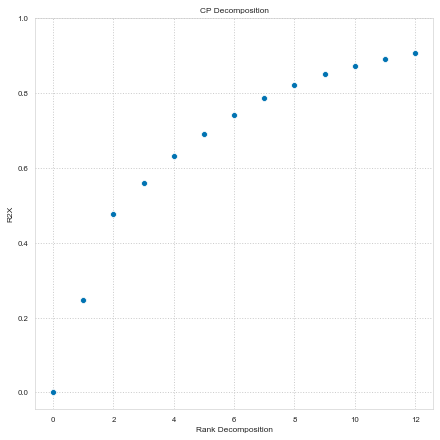

In [7]:
ax, f = getSetup((10, 10), (1, 1))
R2X_figure_partialtucker(ax[0], tensor_measure)

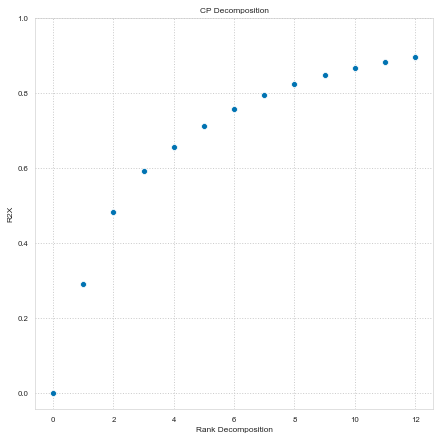

In [8]:
ax, f = getSetup((10, 10), (1, 1))
R2X_figure_partialtucker(ax[0], tensor_protein)

In [59]:
def R2X_figure_tucker(ax, input_tensor, rank_2nd):
    '''Create Tucker R2X Figure'''
    R2X = np.zeros(15)
    for i in range(1, 15):
        rank_list = [4, rank_2nd, i]
        output = tucker_decomp(input_tensor, rank_list)
        R2X[i] = find_R2X_tucker(output, input_tensor)
    sns.scatterplot(np.arange(len(R2X)), R2X, ax=ax)
    ax.set_xlabel("Rank Decomposition")
    ax.set_ylabel("R2X")
    ax.set_title("CP Decomposition")
    ax.set_yticks([0, .2, .4, .6, .8, 1])

In [60]:
tensor, treatments, times = form_tensor()
tensor_measure = z_score_tensor_bymeasure(tensor)


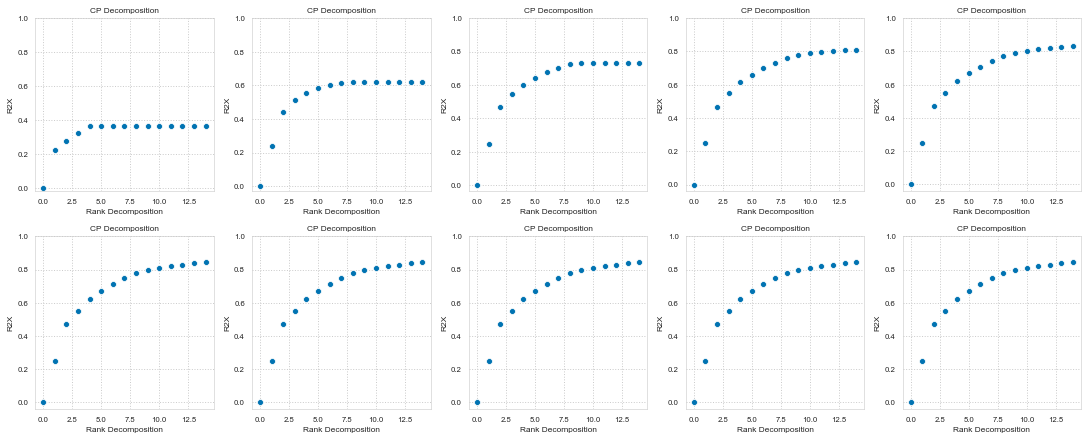

In [61]:
ax, f = getSetup((15, 6), (2, 5))

for i in range(10):
    R2X_figure_tucker(ax[i], tensor_measure, i+1)

In [62]:
tensor, treatments, times = form_tensor()
tensor_protein = z_score_tensor_byprotein(tensor)

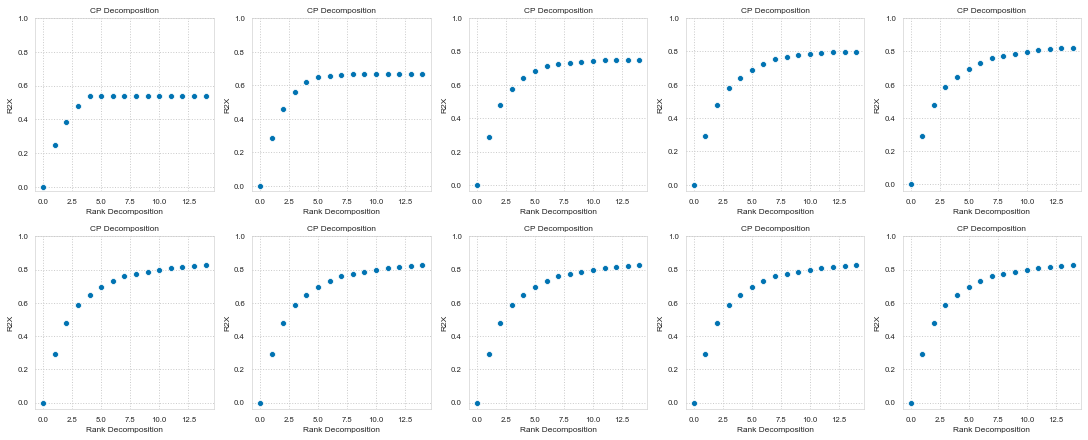

In [63]:
ax, f = getSetup((15, 6), (2, 5))

for i in range(10):
    R2X_figure_tucker(ax[i], tensor_protein, i+1)